1、边看边写。

In [2]:
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [11]:
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
np.random.seed(116)

x_train = x_data[:-30]
x_test = x_data[-30:]
y_train = y_data[:-30]
y_test = y_data[-30:]

x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)

train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

w1 = tf.Variable(tf.random.truncated_normal([4,3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1
train_loss_result = []
test_acc = []
epoch = 500
loss_all = 0

for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
#         with tf.GradientTape as tape:
#             y = tf.matmul(x_train, w1) + b1
#             y = tf.nn.softmax(y)
#             y_ = tf.one_hot(y_train, depth = 3)
#             loss = tf.reduce_mean(tf.square(y - y_))
#             loss_all += loss.numpy()
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy(
        grads = tape.gradient(loss, [w1, b1])
        
        #w1.assign_sub(lr * grads[0])
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])
        
    print("Epoch{}, loss{}").format(epoch, loss_all/4)
    train_loss_result.append(loss_all / 4)
    loss_all = 0
    
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis = 1)
        pred = tf.cast(pred, dtype=y_test.dtype)
        correct = tf.cast(tf.equal(pred, y_test),dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
        total_number += x_test.shape[0]
        
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")
    
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-e38aab5b331a>, line 47)

Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459613651037216
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570249810814857
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028399839997292
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942265003919601
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873638659715652
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299047470093
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922876238822937
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107673570513725
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404685214161873
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802726358175278
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

Epoch 93, loss: 0.07173734065145254
Test_acc: 0.8
--------------------------
Epoch 94, loss: 0.07139724306762218
Test_acc: 0.8
--------------------------
Epoch 95, loss: 0.07106082048267126
Test_acc: 0.8
--------------------------
Epoch 96, loss: 0.07072803936898708
Test_acc: 0.8
--------------------------
Epoch 97, loss: 0.0703988391906023
Test_acc: 0.8
--------------------------
Epoch 98, loss: 0.07007318455725908
Test_acc: 0.8333333333333334
--------------------------
Epoch 99, loss: 0.06975101213902235
Test_acc: 0.8666666666666667
--------------------------
Epoch 100, loss: 0.06943229306489229
Test_acc: 0.8666666666666667
--------------------------
Epoch 101, loss: 0.06911697518080473
Test_acc: 0.8666666666666667
--------------------------
Epoch 102, loss: 0.06880501005798578
Test_acc: 0.8666666666666667
--------------------------
Epoch 103, loss: 0.06849635299295187
Test_acc: 0.8666666666666667
--------------------------
Epoch 104, loss: 0.06819096300750971
Test_acc: 0.86666666666

Epoch 189, loss: 0.05072601139545441
Test_acc: 1.0
--------------------------
Epoch 190, loss: 0.050590197555720806
Test_acc: 1.0
--------------------------
Epoch 191, loss: 0.05045549105852842
Test_acc: 1.0
--------------------------
Epoch 192, loss: 0.05032187048345804
Test_acc: 1.0
--------------------------
Epoch 193, loss: 0.05018933676183224
Test_acc: 1.0
--------------------------
Epoch 194, loss: 0.05005786754190922
Test_acc: 1.0
--------------------------
Epoch 195, loss: 0.049927457235753536
Test_acc: 1.0
--------------------------
Epoch 196, loss: 0.049798084422945976
Test_acc: 1.0
--------------------------
Epoch 197, loss: 0.04966974724084139
Test_acc: 1.0
--------------------------
Epoch 198, loss: 0.049542427994310856
Test_acc: 1.0
--------------------------
Epoch 199, loss: 0.04941612295806408
Test_acc: 1.0
--------------------------
Epoch 200, loss: 0.049290806986391544
Test_acc: 1.0
--------------------------
Epoch 201, loss: 0.0491664744913578
Test_acc: 1.0
---------

Test_acc: 1.0
--------------------------
Epoch 298, loss: 0.04049770440906286
Test_acc: 1.0
--------------------------
Epoch 299, loss: 0.04043352697044611
Test_acc: 1.0
--------------------------
Epoch 300, loss: 0.040369720198214054
Test_acc: 1.0
--------------------------
Epoch 301, loss: 0.0403062766417861
Test_acc: 1.0
--------------------------
Epoch 302, loss: 0.04024319909512997
Test_acc: 1.0
--------------------------
Epoch 303, loss: 0.04018047917634249
Test_acc: 1.0
--------------------------
Epoch 304, loss: 0.0401181192137301
Test_acc: 1.0
--------------------------
Epoch 305, loss: 0.04005610244348645
Test_acc: 1.0
--------------------------
Epoch 306, loss: 0.03999444330111146
Test_acc: 1.0
--------------------------
Epoch 307, loss: 0.039933132007718086
Test_acc: 1.0
--------------------------
Epoch 308, loss: 0.03987216157838702
Test_acc: 1.0
--------------------------
Epoch 309, loss: 0.039811539463698864
Test_acc: 1.0
--------------------------
Epoch 310, loss: 0.039

Epoch 413, loss: 0.034939922858029604
Test_acc: 1.0
--------------------------
Epoch 414, loss: 0.03490366414189339
Test_acc: 1.0
--------------------------
Epoch 415, loss: 0.03486756607890129
Test_acc: 1.0
--------------------------
Epoch 416, loss: 0.03483161982148886
Test_acc: 1.0
--------------------------
Epoch 417, loss: 0.03479582816362381
Test_acc: 1.0
--------------------------
Epoch 418, loss: 0.03476018365472555
Test_acc: 1.0
--------------------------
Epoch 419, loss: 0.034724696073681116
Test_acc: 1.0
--------------------------
Epoch 420, loss: 0.03468935890123248
Test_acc: 1.0
--------------------------
Epoch 421, loss: 0.03465416934341192
Test_acc: 1.0
--------------------------
Epoch 422, loss: 0.03461912786588073
Test_acc: 1.0
--------------------------
Epoch 423, loss: 0.03458422888070345
Test_acc: 1.0
--------------------------
Epoch 424, loss: 0.034549479372799397
Test_acc: 1.0
--------------------------
Epoch 425, loss: 0.03451488073915243
Test_acc: 1.0
----------

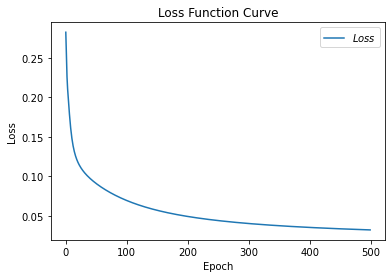

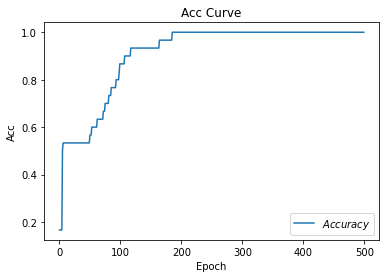

In [12]:
# -*- coding: UTF-8 -*-
# 利用鸢尾花数据集，实现前向传播、反向传播，可视化loss曲线

# 导入所需模块
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样（为方便教学，以保每位同学结果一致）
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# 生成神经网络的参数，4个输入特征故，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同（方便教学，使大家结果都一致，在现实使用时不写seed）
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

# 训练部分
for epoch in range(epoch):  #数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  #batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all/4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")

# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()


2、默写，用一层神经网络实现鸢尾花分类。